In [ ]:
#necessary imports
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import folium

In [69]:
#create function to webscrape from KGET homicide tracker from years 2016-2019
#empty lists
name_list = []
date_list = []
cod_list = []
victim_list = []
accused_list = []
cat_list = []
scene_list = []
zip_list = []
ag_list = []
jud_list = []
years = [2016, 2017, 2018, 2019]

def kget():
    for year in years:
        url = f'https://media.psg.nexstardigital.net/kget/feature_pages/Homicide_Tracker/{year}-victims.html'
        response = requests.get(url)
        content = response.content
        soup = BeautifulSoup(content, "html.parser")
        profiles = soup.find_all('div', class_='htrecord')
        for profile in profiles:
            date = profile.text
            date_info = date.splitlines()
            name = date_info[2]
            name_list.append(name)
            date = date_info[4]
            date_list.append(date)
            cod = date_info[5]
            cod_list.append(cod)
            victim = date_info[6]
            victim_list.append(victim)
            accused = date_info[7]
            accused_list.append(accused)
            cat = date_info[8]
            cat_list.append(cat)
            scene = date_info[9]
            scene_list.append(scene)
            zip = date_info[10]
            zip_list.append(zip)
            ag = date_info[12]
            ag_list.append(ag)
            jud = date_info[13]
            jud_list.append(jud)
    return pd.DataFrame({"Name_Age" : name_list , "Date" : date_list, "Cause of Death" : cod_list,  "Victim Race" : victim_list,  'Accused Race' : accused_list,
                    'Category' : cat_list, 'Scene of Crime' : scene_list, 'Zipcode' : zip_list, 'Agency' : ag_list, "Judicial Status" : jud_list})

    
    
    


In [70]:
#run function and save data to csv
victims = kget()

In [68]:
victims.to_csv("victims.csv")

In [72]:
victims.tail()

,Name_Age,Date,Cause of Death,Victim Race,Accused Race,Category,Scene of Crime,Zipcode,Agency,Judicial Status
395,"Jose Ramon Deleon, 25",Date: 01/27/2019,Cause of death: Multiple gunshot wounds,Victim's Race: N/A,Accused's Race: N/A,Category: Shooting,"Crime Scene: 1600 block of Mint Street, Bakers...",Zip Code: 93304,Agency: Kern County Sheriff's Office,Judicial Status: No arrests made
396,"Luciano Jose Ramos, 38",Date: 01/08/2019,Cause of death: Stab wounds,Victim's Race: Hispanic,Accused's Race: N/A,Category: Stabbing,"Crime Scene: 8900 block of Hall Road, Lamont",Zip Code: 93241,Agency: Kern County Sheriff's Office,Judicial Status: 34-year-old Ricardo Tapia was...
397,"Louie Arturo Hernandez, 19",Date: 01/08/2019,Cause of death: Gunshot Wounds,Victim's Race: N/A,Accused's Race: N/A,Category: Shooting,Crime Scene: 800 block of Dr Martin Luther Kin...,Zip Code: 93307,Agency: Bakersfield Police Department,Judicial Status: Michael Castenada has been ar...
398,"Edgar Modesto Lopez, 43",Date: 01/01/2019,Cause of death: Gunshot wound,Victim's Race: Hispanic,Accused's Race: N/A,Category: Shooting,Crime Scene: 3100 block of South H St.,Zip Code: 93304,Agency: Bakersfield Police Department,Judicial Status: Three arrest made for acting ...
399,"Santos Zeferino Perfecto, 49",Date: 01/01/2019,Cause of death: Gunshot wound,Victim's Race: Hispanic,Accused's Race: N/A,Category: Shooting,Crime Scene: 700 block of Fremont St.,Zip Code: 93215,Agency: Delano Police Department,Judicial Status: No charges filed


In [103]:
#create function to scrape KGET homicide tracker for years 2020-2023 because the HTML formatting is different

name_list = []
date_list = []
cod_list = []
cat_list = []
scene_list = []
zip_list = []
ag_list = []
jud_list = []
years = [2020, 2021, 2022, 2023]

def kget_two():
    for year in years:
        url = f'https://media.psg.nexstardigital.net/kget/feature_pages/Homicide_Tracker/{year}-victims.html'
        response = requests.get(url)
        content = response.content
        soup = BeautifulSoup(content, "html.parser")
        profiles = soup.find_all('div', class_='htMain')
        for profile in profiles:
            name_age = profile.find('h3').text
            name_list.append(name_age)
            date = profile.find_all('div', class_ = "victimDatum")[0].text
            date_list.append(date)
            cod = profile.find_all('div', class_ = "victimDatum")[2].text
            cod_list.append(cod)
            cat = profile.find_all('div', class_ = "victimDatum")[5].text
            cat_list.append(cat)
            scene = profile.find_all('div', class_ = "victimDatum")[6].text
            scene_list.append(scene)
            zip = profile.find_all('div', class_ = "victimDatum")[7].text
            zip_list.append(zip)
            ag  = profile.find_all('div', class_ = "victimDatum")[9].text
            ag_list.append(ag)
            jud = profile.find_all('div', class_ = "victimDatum")[10].text
            jud_list.append(jud)
    return pd.DataFrame({"Name_Age" : name_list , "Date" : date_list, "Cause of Death" : cod_list, 
                    'Category' : cat_list, 'Scene of Crime' : scene_list, 'Zipcode' : zip_list, 'Agency' : ag_list, "Judicial Status" : jud_list})

    
    

In [104]:
#run function and save dataframe to csv
victims2 = kget_two()

In [106]:
victims2.to_csv("victims2.csv")

In [107]:
victims2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name_Age         458 non-null    object
 1   Date             458 non-null    object
 2   Cause of Death   458 non-null    object
 3   Category         458 non-null    object
 4   Scene of Crime   458 non-null    object
 5   Zipcode          458 non-null    object
 6   Agency           458 non-null    object
 7   Judicial Status  458 non-null    object
dtypes: object(8)
memory usage: 28.8+ KB


In [116]:
df = pd.read_csv("victims.csv")

In [121]:
victims2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name_Age         458 non-null    object
 1   Date             458 non-null    object
 2   Cause of Death   458 non-null    object
 3   Category         458 non-null    object
 4   Scene of Crime   458 non-null    object
 5   Zipcode          458 non-null    object
 6   Agency           458 non-null    object
 7   Judicial Status  458 non-null    object
dtypes: object(8)
memory usage: 28.8+ KB


In [124]:
#combine two dataframes
frames = [df, victims2]

all_victims = pd.concat(frames)

In [125]:
all_victims.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 0 to 457
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name_Age         858 non-null    object
 1   Date             858 non-null    object
 2   Cause of Death   858 non-null    object
 3   Category         858 non-null    object
 4   Scene of Crime   858 non-null    object
 5   Zipcode          858 non-null    object
 6   Agency           858 non-null    object
 7   Judicial Status  858 non-null    object
dtypes: object(8)
memory usage: 60.3+ KB


In [126]:
#save to csv
all_victims.to_csv("victims.csv")

In [3]:
#load csv
df = pd.read_csv("victims.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       858 non-null    int64 
 1   Name_Age         858 non-null    object
 2   Date             858 non-null    object
 3   Cause of Death   858 non-null    object
 4   Category         858 non-null    object
 5   Scene of Crime   858 non-null    object
 6   Zipcode          858 non-null    object
 7   Agency           858 non-null    object
 8   Judicial Status  858 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.5+ KB


In [23]:
#remove category listing before data in rows

columns = ["Date", "Cause of Death", "Category", "Scene of Crime", "Zipcode", "Agency", "Judicial Status"]

for column in columns:
    df[column] = df[column].str.split(":").str[1]
print(df)
    

     Unnamed: 0                         Name_Age         Date  Cause of Death  \
0             0     Patrick Lerossignal Hull, 46   12/30/2016     Stab wounds   
1             1    Zacarias Devon Lee Oliver, 19   12/26/2016   Gunshot wound   
2             2              Arthur Gonzalez, 31   12/26/2016   Gunshot wound   
3             3          Marcus Deon DeLouth, 19   12/18/2016   Gunshot wound   
4             4  Itzel Lazaro, 2 months, 12 days   12/13/2016    Not released   
..          ...                              ...          ...             ...   
853         453            Louis J. Bachicha, 34   2023-01-12         Pending   
854         454             Saul Ramierz Jr., 28   2023-01-06         Pending   
855         455   Deszesk Lavon Halliman Jr., 22   2023-01-06         Pending   
856         456       Kenneth Dexter Watkins, 46   2023-01-03         Pending   
857         457           Juan Carlos Urvina, 54   2023-01-01         Pending   

                       Cate

In [24]:
df.head()

,Unnamed: 0,Name_Age,Date,Cause of Death,Category,Scene of Crime,Zipcode,Agency,Judicial Status
0,0,"Patrick Lerossignal Hull, 46",12/30/2016,Stab wounds,Carjacking,145 U St.,93304,Bakersfield Police Department,No charges filed
1,1,"Zacarias Devon Lee Oliver, 19",12/26/2016,Gunshot wound,Shooting,1107 East Planz Road,93307,Bakersfield Police Department,No charges filed
2,2,"Arthur Gonzalez, 31",12/26/2016,Gunshot wound,Shooting,500 block of east 3rd street,93307,Bakersfield Police Department,No charges filed
3,3,"Marcus Deon DeLouth, 19",12/18/2016,Gunshot wound,Shooting,701 Meyer St.,93203,Arvin Police Department,No charges filed
4,4,"Itzel Lazaro, 2 months, 12 days",12/13/2016,Not released,Child death,413 Wilma St.,93307,Kern County Sheriff's Office,Undisclosed


In [33]:
#split name_age column into separate 'name' and 'age' columns
df["Name"] = df["Name_Age"].str.split(",").str[0]

In [34]:
df["Age"] = df["Name_Age"].str.split(",").str[1]

In [37]:
#select relevant columns for new dataframe
df = df[["Name", "Age", "Date", "Cause of Death", "Category", "Scene of Crime", "Zipcode", "Agency", "Judicial Status"]]

In [43]:
#remove any whitespace
columns = ["Name", "Age" , "Date", "Cause of Death", "Category", "Scene of Crime", "Zipcode", "Agency", "Judicial Status"]

for column in columns:
    df[column] = df[column].str.strip()
print(df)

                           Name       Age        Date Cause of Death  \
0      Patrick Lerossignal Hull        46  12/30/2016    Stab wounds   
1     Zacarias Devon Lee Oliver        19  12/26/2016  Gunshot wound   
2               Arthur Gonzalez        31  12/26/2016  Gunshot wound   
3           Marcus Deon DeLouth        19  12/18/2016  Gunshot wound   
4                  Itzel Lazaro  2 months  12/13/2016   Not released   
..                          ...       ...         ...            ...   
853           Louis J. Bachicha        34  2023-01-12        Pending   
854            Saul Ramierz Jr.        28  2023-01-06        Pending   
855  Deszesk Lavon Halliman Jr.        22  2023-01-06        Pending   
856      Kenneth Dexter Watkins        46  2023-01-03        Pending   
857          Juan Carlos Urvina        54  2023-01-01        Pending   

                      Category                          Scene of Crime  \
0                   Carjacking                               

C:\Users\adaml\AppData\Local\Temp\ipykernel_17856\3974247701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.strip()


In [10]:
#create dataframe with null values
test = df.isnull()

In [15]:
#fill empty 'Judicial Status' with 'N/A'
df["Judicial Status"] = df["Judicial Status"].fillna("N/A")

In [19]:
#fill remaining missing values with N/A
df.fillna("N/A")

,Name,Age,Date,Cause of Death,Category,Scene of Crime,Zipcode,Agency,Judicial Status
0,Patrick Lerossignal Hull,46,12/30/2016,Stab wounds,Carjacking,145 U St.,93304,Bakersfield Police Department,No charges filed
1,Zacarias Devon Lee Oliver,19,12/26/2016,Gunshot wound,Shooting,1107 East Planz Road,93307,Bakersfield Police Department,No charges filed
2,Arthur Gonzalez,31,12/26/2016,Gunshot wound,Shooting,500 block of east 3rd street,93307,Bakersfield Police Department,No charges filed
3,Marcus Deon DeLouth,19,12/18/2016,Gunshot wound,Shooting,701 Meyer St.,93203,Arvin Police Department,No charges filed
4,Itzel Lazaro,2 months,12/13/2016,Not released,Child death,413 Wilma St.,93307,Kern County Sheriff's Office,Undisclosed
...,...,...,...,...,...,...,...,...,...
853,Louis J. Bachicha,34,2023-01-12,Pending,Assault,3000 W Cecil Avenue (map),93215,Kern Valley State Prison,No arrests at this time.
854,Saul Ramierz Jr.,28,2023-01-06,Pending,Shooting,600 block of Darling Point Drive (map),93307,Kern County Sheriff's Office,No arrests at this time.
855,Deszesk Lavon Halliman Jr.,22,2023-01-06,Pending,Shooting,600 block of Darling Point Drive (map),93307,Kern County Sheriff's Office,No arrests at this time.
856,Kenneth Dexter Watkins,46,2023-01-03,Pending,Officer-Involved Shooting,300 block of Sahara Drive (map),93555,Kern County Sheriff's Office,No arrests at this time.


In [25]:
import datetime

In [32]:
#convert improper datetime value
df["Date"] = df["Date"].replace({"00/00/0000" : "01/01/1900"})

In [33]:

df["Date"] = pd.to_datetime(df["Date"])

ValueError: time data "2020-12-31" doesn't match format "%m/%d/%Y", at position 400. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [30]:
#check index with ValueError
df.loc[313]

Name                                              Karl Wayne Sharrah
Age                                                               49
Date                                                      00/00/0000
Cause of Death                               Multiple Gunshot Wounds
Category                                                    Shooting
Scene of Crime     Open Desert, Northeast of Dust Devil Avenue, N...
Zipcode                                                        93523
Agency                                  Kern County Sheriff’s Office
Judicial Status                                                  N/A
Name: 313, dtype: object

In [34]:
df2 = df.copy()

In [38]:
#the two dataframes have different date formats, so create a dataframe with values that have the month listed first
month_first = df2.loc[0:399]

In [39]:
month_first.tail()

,Name,Age,Date,Cause of Death,Category,Scene of Crime,Zipcode,Agency,Judicial Status
395,Jose Ramon Deleon,25,01/27/2019,Multiple gunshot wounds,Shooting,"1600 block of Mint Street, Bakersfield",93304,Kern County Sheriff's Office,No arrests made
396,Luciano Jose Ramos,38,01/08/2019,Stab wounds,Stabbing,"8900 block of Hall Road, Lamont",93241,Kern County Sheriff's Office,34-year-old Ricardo Tapia was arrested for mur...
397,Louie Arturo Hernandez,19,01/08/2019,Gunshot Wounds,Shooting,800 block of Dr Martin Luther King Jr Blvd.,93307,Bakersfield Police Department,Michael Castenada has been arrested. Jose Lope...
398,Edgar Modesto Lopez,43,01/01/2019,Gunshot wound,Shooting,3100 block of South H St.,93304,Bakersfield Police Department,Three arrest made for acting as accessories. A...
399,Santos Zeferino Perfecto,49,01/01/2019,Gunshot wound,Shooting,700 block of Fremont St.,93215,Delano Police Department,No charges filed


In [43]:
#convert 'month_first' 'date' column to datetime value'
month_first["Date"] = pd.to_datetime(month_first["Date"])
#create a month and year column for 'month_first' dataset
month_first['month'] = month_first['Date'].dt.month
month_first["year"] = month_first["Date"].dt.year

C:\Users\adaml\AppData\Local\Temp\ipykernel_8256\483892016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_first["Date"] = pd.to_datetime(month_first["Date"])


In [53]:
month_first.head()

,Name,Age,Date,Cause of Death,Category,Scene of Crime,Zipcode,Agency,Judicial Status,month,year
0,Patrick Lerossignal Hull,46,2016-12-30,Stab wounds,Carjacking,145 U St.,93304,Bakersfield Police Department,No charges filed,12,2016
1,Zacarias Devon Lee Oliver,19,2016-12-26,Gunshot wound,Shooting,1107 East Planz Road,93307,Bakersfield Police Department,No charges filed,12,2016
2,Arthur Gonzalez,31,2016-12-26,Gunshot wound,Shooting,500 block of east 3rd street,93307,Bakersfield Police Department,No charges filed,12,2016
3,Marcus Deon DeLouth,19,2016-12-18,Gunshot wound,Shooting,701 Meyer St.,93203,Arvin Police Department,No charges filed,12,2016
4,Itzel Lazaro,2 months,2016-12-13,Not released,Child death,413 Wilma St.,93307,Kern County Sheriff's Office,Undisclosed,12,2016


In [54]:
#create dataframe that has dates in year first format
year_first = df2.loc[400:]
#convert 'year_first' 'date' column to 'datetime' value'
year_first['Date'] = pd.to_datetime(year_first['Date'], format='%Y-%m-%d')
#create a month and year column for 'year_first' dataframe
year_first['month'] = year_first['Date'].dt.month
#add 'year' column for 'year_first' df
year_first["year"] = year_first["Date"].dt.year

C:\Users\adaml\AppData\Local\Temp\ipykernel_8256\2327441038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_first['month'] = year_first['Date'].dt.month


In [55]:
year_first.head()

,Name,Age,Date,Cause of Death,Category,Scene of Crime,Zipcode,Agency,Judicial Status,month
400,Emmanuel Arechiga,18,2020-12-31,N/A,Shooting,"Morin Court, Bakersfield (map)",93304,Bakersfield Police Department,No arrests at this time,12
401,Efren Alcala Lopez,27,2020-12-30,N/A,Shooting,"Southbound State Route 99, south of Woollomes ...",93215,California Highway Patrol,No arrests at this time.,12
402,Vincente Hinojosa Regalado,23,2020-12-26,N/A,Shooting,"1500 block of Poplar Avenue, Wasco (map)",93280,Kern County Sheriff's Office,No arrests at this time.,12
403,Delbert Benskin,62,2020-12-25,Blunt Injuries,Assault,"15 S. Chester Ave, Bakersfield (map)",93304,Bakersfield Police Department,No arrests at this time.,12
404,Manuel Acosta,37,2020-12-24,N/A,Shooting,"600 block of 12th Avenue, Delano (map)",93215,Delano Police Department,No arrests at this time.,12


In [57]:
#combine the 'year_first' and 'month_first' dataframes
frames = [month_first, year_first]

df = pd.concat(frames)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             858 non-null    object        
 1   Age              858 non-null    object        
 2   Date             858 non-null    datetime64[ns]
 3   Cause of Death   858 non-null    object        
 4   Category         858 non-null    object        
 5   Scene of Crime   858 non-null    object        
 6   Zipcode          858 non-null    object        
 7   Agency           858 non-null    object        
 8   Judicial Status  858 non-null    object        
 9   month            858 non-null    int32         
 10  year             858 non-null    int32         
dtypes: datetime64[ns](1), int32(2), object(8)
memory usage: 67.2+ KB


In [59]:
#check for unique age values
df["Age"].unique()

array(['46', '19', '31', '2 months', '73', 'About 39 weeks gestation',
       '30', '40', '75', '21', '49', '66', '27', '60', '33', '22', '63',
       '32', '14', '51', '34', '37', '24', '41', '50', '58', '39', '43',
       'Jr.', '25', 'Unborn baby', '18', '23', '26', '29', '48', '42',
       '20', '18 days', '28', '53', '54', 'Undisclosed', '45', '61', '38',
       '2', '52', '67', '17', '3', '71', '36', '3 months', '35', '56',
       '11 months', '47', '9 months old', '15', '59', '4 months', '5',
       '64', '8 months', '57', '19 months', '77', '22 months', '12',
       'Sr.', '84', '1', '55', 'N/A', '44', '83', '68', '62', '65', '11',
       '13', 'Jr', '3 days', '16', '8', 'Pending', '78', '10', 'Unknown',
       '70', '17 months', '6 months', '81'], dtype=object)

In [60]:
#some age values are listed as senior, indexing issue when webscraping
df[df["Age"] == "Sr."]

,Name,Age,Date,Cause of Death,Category,Scene of Crime,Zipcode,Agency,Judicial Status,month,year
267,Marcos Gamez Miranda,Sr.,2018-06-02,Stab wounds,Stabbing,700 block of Vine Street,93307,Kern County Sheriff's Office,No charges filed,6,2018
278,Eduardo Salinas,Sr.,2018-04-24,Gunshot wound,Shooting,"1900 block of 4th Street, Wasco",93280,Kern County Sheriff's Office,Charges filed,4,2018


In [67]:
#update correct age - got information from kget homicide tracker
df.at[278, 'Age']= 51

In [68]:
df.loc[278]

Name                               Eduardo Salinas
Age                                             51
Date                           2018-04-24 00:00:00
Cause of Death                       Gunshot wound
Category                                  Shooting
Scene of Crime     1900 block of 4th Street, Wasco
Zipcode                                      93280
Agency                Kern County Sheriff's Office
Judicial Status                      Charges filed
month                                            4
year                                          2018
Name: 278, dtype: object

In [69]:
df["Age"].unique()

array(['46', '19', '31', '2 months', '73', 'About 39 weeks gestation',
       '30', '40', '75', '21', '49', '66', '27', '60', '33', '22', '63',
       '32', '14', '51', '34', '37', '24', '41', '50', '58', '39', '43',
       'Jr.', '25', 'Unborn baby', '18', '23', '26', '29', '48', '42',
       '20', '18 days', '28', '53', '54', 'Undisclosed', '45', '61', '38',
       '2', '52', '67', '17', '3', '71', '36', '3 months', '35', '56',
       '11 months', '47', '9 months old', '15', '59', '4 months', '5',
       '64', '8 months', '57', '19 months', '77', '22 months', '12', 36,
       51, '84', '1', '55', 'N/A', '44', '83', '68', '62', '65', '11',
       '13', 'Jr', '3 days', '16', '8', 'Pending', '78', '10', 'Unknown',
       '70', '17 months', '6 months', '81'], dtype=object)

In [78]:
#change month values to decimal values, and unknown vales to 1000
df2.replace({"2 months" : 0.17, "About 39 weeks gestation" : 0, "Unborn baby" : 0,
             "18 days" : 0.05, "Undisclosed" : 1000, "3 months" : 0.25,
             "11 months" : 0.92, "9 months" : 0.75, "4 months" : 0.33,
             "8 months" : 0.67, "19 months" : 1.58, "22 months" : 1.92,
             "N/A" : 1000, "3 days" : 0.008, "Pending" : 1000, "Unknown" : 1000,
             "17 months" : 1.42, "6 months" : 0.5, "9 months old" : 0.75, "Jr" : 49}, inplace = True)
             

In [79]:
#check ages again
df2["Age"].unique()

array(['46', '19', '31', 0.17, '73', 0, '30', '40', '75', '21', '49',
       '66', '27', '60', '33', '22', '63', '32', '14', '51', '34', '37',
       '24', '41', '50', '58', '39', '43', 'Jr.', '25', '18', '23', '26',
       '29', '48', '42', '20', 0.05, '28', '53', '54', 1000, '45', '61',
       '38', '2', '52', '67', '17', '3', '71', '36', 0.25, '35', '56',
       0.92, '47', 0.75, '15', '59', 0.33, '5', '64', 0.67, '57', 1.58,
       '77', 1.92, '12', 36, 51, '84', '1', '55', '44', '83', '68', '62',
       '65', '11', '13', 49, 0.008, '16', '8', '78', '10', '70', 1.42,
       0.5, '81'], dtype=object)

In [82]:
#similar with 'sr.', there was an indexing issue when scraping names that contained 'jr'
df2[df2["Age"] == "Jr."]

,Name,Age,Date,Cause of Death,Category,Scene of Crime,Zipcode,Agency,Judicial Status,month,year
37,Patrick Martinez,Jr.,2016-07-18,Gunshot wound,Shooting,Alley of the 3100 block of Monterey Street,93306,Kern County Sheriff's Office,No charges filed,7,2016
52,Ricardo Martinez,Jr.,2016-05-26,Gunshot wound,Shooting,"2222 Norwalk St., Delano",93215,Delano Police Department,No charges filed,5,2016
96,Cipriano Ismael Maldonado,Jr.,2016-01-14,Gunshot wound,Shooting,1000 block of Knotts Street,93305,Kern County Sheriff's Office,No charges filed,1,2016
98,Ernesto Ramirez,Jr.,2016-01-01,Gunshot wound,Shooting,2700 block of University Avenue,93306,Bakersfield Police Department,No charges filed,1,2016
101,Ismael Armando Gutierrez,Jr.,2017-12-17,Gunshot wound,Suspected gang shooting,Krauter Street and Walnut Drive,93203,Arvin Police Department,No charges filed,12,2017
107,Erskine Carr,Jr.,2017-12-01,Gunshot wound,Shooting,900 block of Baker Street,93305,Bakersfield Police Department,No charges filed,12,2017
150,William Carrillo,Jr.,2017-07-14,Gunshot wound,Suspected gang shooting,East Sherwood Ave. & San Pedro Street in McFar...,93250,McFarland Police Department,Charges dropped,7,2017
157,Antonio Gutierrez,Jr.,2017-06-24,Gunshot wound,Suspected gang shooting,"1000 block of Lexington Avenue, Delano",93215,Delano Police Department,No charges filed,6,2017
170,Michael Titus Washington,Jr.,2017-05-16,Gunshot wound,Shooting,1200 38th St.,93301,Bakersfield Police Department,No charges filed,5,2017
185,Victor Palomo,Jr.,2017-03-04,Gunshot wound,Shooting,1200 Block of Freemont Street in Delano,93215,Delano Police Department,Conviction,3,2017


In [86]:
#checked KGET homicide tracker to get correct age for each index
df2.at[37, 'Age']= 35
df2.at[52, 'Age']= 40
df2.at[96, 'Age']= 35
df2.at[98, 'Age']= 29
df2.at[101, 'Age']= 21
df2.at[107, 'Age']= 40
df2.at[150, 'Age']= 25
df2.at[157, 'Age']= 31
df2.at[170, 'Age']= 35
df2.at[185, 'Age']= 37
df2.at[211, 'Age']= 65
df2.at[214, 'Age']= 30
df2.at[234, 'Age']= 26
df2.at[244, 'Age']= 39
df2.at[529, 'Age']= 17
df2.at[530, 'Age']= 33
df2.at[617, 'Age']= 26

In [87]:
#make sure all 'jrs' are accounted for
df2[df2["Age"] == "Jr."]

,Name,Age,Date,Cause of Death,Category,Scene of Crime,Zipcode,Agency,Judicial Status,month,year


In [88]:
#change age data type to float
df2["Age"] = df2["Age"].astype(float)

In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             858 non-null    object        
 1   Age              858 non-null    float64       
 2   Date             858 non-null    datetime64[ns]
 3   Cause of Death   858 non-null    object        
 4   Category         858 non-null    object        
 5   Scene of Crime   858 non-null    object        
 6   Zipcode          858 non-null    object        
 7   Agency           858 non-null    object        
 8   Judicial Status  858 non-null    object        
 9   month            858 non-null    int32         
 10  year             858 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(7)
memory usage: 67.2+ KB


In [90]:
df = df2

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             858 non-null    object 
 1   Age              858 non-null    float64
 2   Date             858 non-null    object 
 3   Cause of Death   858 non-null    object 
 4   Category         858 non-null    object 
 5   Scene of Crime   858 non-null    object 
 6   Zipcode          858 non-null    object 
 7   Agency           858 non-null    object 
 8   Judicial Status  858 non-null    object 
 9   month            858 non-null    int64  
 10  year             858 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 73.9+ KB


In [7]:
df["year"].value_counts()

year
2020    140
2021    136
2018    111
2017    103
2022    103
2016     99
2019     86
2023     79
1900      1
Name: count, dtype: int64

In [20]:
#correct month and year for incorrect value
df.at[313, 'month']= 10

In [21]:
df.at[313, 'year'] = 2016

In [22]:
#number of homicides per year
df["year"].value_counts()

year
2020    140
2021    136
2018    111
2017    103
2022    103
2016    100
2019     86
2023     79
Name: count, dtype: int64

The number of homicides peaked in 2020 and 2021, and reached a low in 2023. The other years listed hover around 100.

<Axes: title={'center': 'Number of Homicides by Year'}, xlabel='year'>

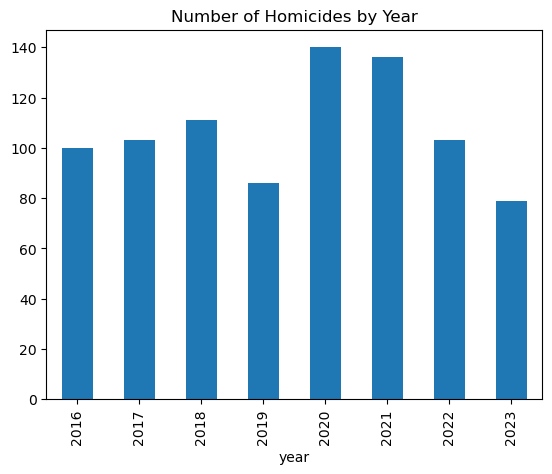

In [24]:
#plot graph showing the number of homicides per year

df["year"].value_counts().sort_index().plot(kind="bar", title = "Number of Homicides by Year")

<Axes: title={'center': 'Percentage of Total Homicides (2016-2023) by Year'}, xlabel='year'>

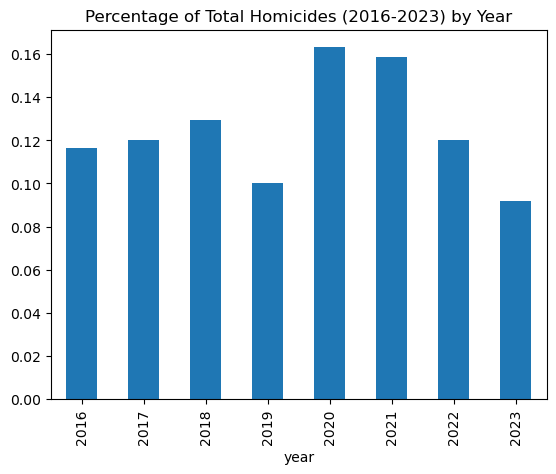

In [27]:
df["year"].value_counts(normalize=True).sort_index().plot(kind="bar", title = "Percentage of Total Homicides (2016-2023) by Year")

Zipcode 93307 is the most dangerous in Kern County, accounting for over 140 homicides from 2016-2023. This zipcode is
in East Bakersfield and contains the area also known as Greenfield. 93215 is the second most dangerous zipcode, and 
is located in Delano. 

<Axes: title={'center': 'Top 20 Zip Codes by Homicide Count'}, ylabel='Zipcode'>

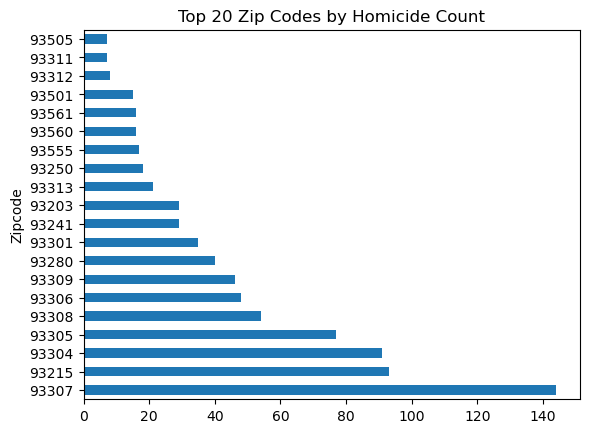

In [28]:
df["Zipcode"].value_counts().head(20).plot(kind="barh", title = "Top 20 Zip Codes by Homicide Count")

<Axes: title={'center': 'Top 20 Zip Codes by Total Homicide Percentage'}, ylabel='Zipcode'>

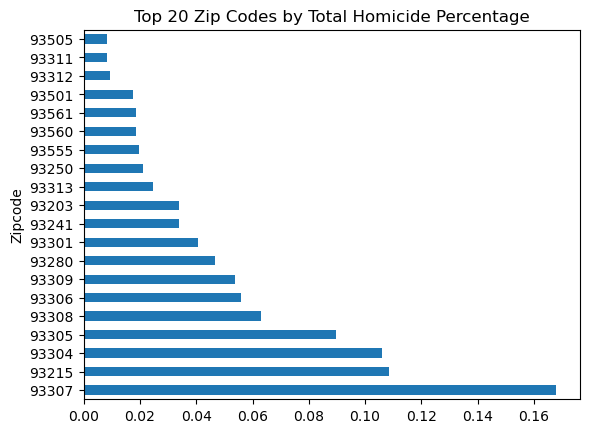

In [28]:
df["Zipcode"].value_counts(normalize=True).head(20).plot(kind="barh", title = "Top 20 Zip Codes by Total Homicide Percentage")

<Axes: title={'center': 'Homicide Count by Month'}, ylabel='month'>

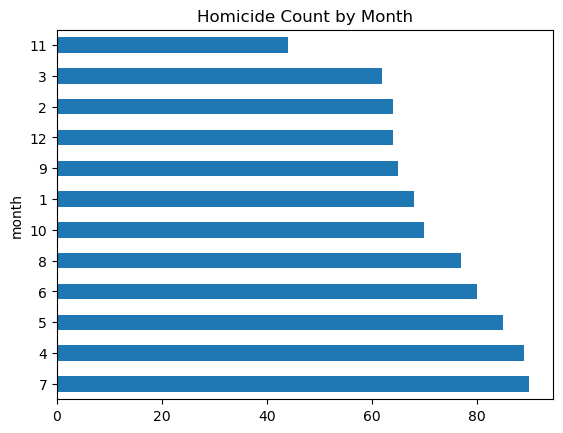

In [30]:
df["month"].value_counts().plot(kind="barh", title = "Homicide Count by Month")

July and April are the most dangerous months for homicides, with April to August being the most dangerous part of the year. November
is quite a bit lower that the other months, and it would be interesting to research that further.

<Axes: title={'center': 'Homicide Count by Month'}, xlabel='month'>

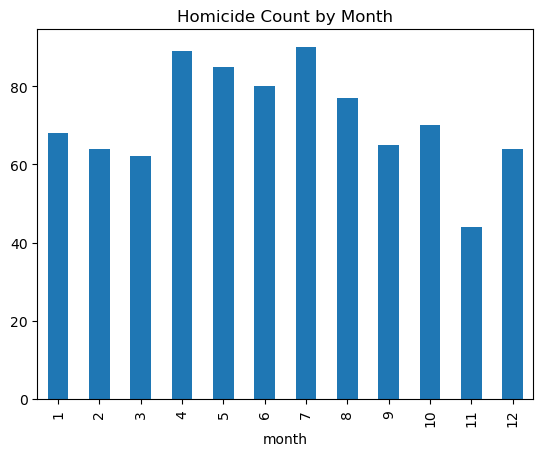

In [147]:
df["month"].value_counts().sort_index().plot(kind="bar", title = "Homicide Count by Month")

In [5]:
data = df.copy()

In [11]:
#create age category column
bins = [-1, 9, 13, 17, 24, 34, 44, 54, 64, 100]
labels = ["0-9", "10-13", "14-17", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

data['age_category'] = pd.cut(data['Age'], bins=bins, labels=labels)

In [15]:
data["Category"].unique()

array(['Carjacking', 'Shooting', 'Child death',
       'Officer-involved shooting', 'Domestic violence', 'Robbery',
       '1000', 'Remains found', 'Suspected gang robbery', 'Fight',
       'In-custody death', 'Accidental shooting', 'Gang shooting',
       'Hit-and-run', 'Possible domestic violence', 'Family violence',
       'Prison death', 'Suspected gang shooting/stray bullet',
       'Suspected gang shooting', 'Miscarriage', 'Strangled', 'Stabbing',
       'Suspected gang shooting/pot shop shooting', 'Home invasion',
       'Child abuse', 'Suspected gang stabbing', 'Assault',
       'Casino shooting', 'Not released', 'Child abuse death',
       'Homeless man killed', 'Love triangle', 'Drowning',
       'Pot shop shooting', 'Drive-by shooting', 'Workplace violence',
       'Hit by a car', 'Murder suicide', 'Fire', 'Party stabbing',
       'Vandalism confrontation', 'Body found in burning car',
       'Domestic violence/Mass murder', 'Mass murder', 'Missing person',
       'Body foun

In [32]:
#group crime categories together
data.loc[data['Category'].str.contains('gang', case=False, na=False), 'gang'] = 1
data.loc[data['Category'].str.contains('robbery|invasion', case=False, na=False), 'robbery'] = 1
data.loc[data['Category'].str.contains('child abuse', case=False, na=False), 'child abuse'] = 1
data.loc[data['Category'].str.contains('family|domestic', case=False, na=False), 'domestic_family'] = 1
data.loc[data['Category'].str.contains('officer', case=False, na=False), 'officer_involved'] = 1
data.loc[data['Category'].str.contains('prison|inmate|in-custody', case=False, na=False), 'prison'] = 1
data.loc[data['Category'].str.contains('homeless', case=False, na=False), 'homeless_death'] = 1
data.loc[data['Category'].str.contains('vehicular|hit by a car|hit-and-run', case=False, na=False), 'vehicular'] = 1
data.loc[data['Category'].str.contains('suicide|murder-suicide', case=False, na=False), 'murder_suicide'] = 1
data.loc[data['Category'].str.contains('accidental', case=False, na=False), 'accidental'] = 1
data.loc[data['Category'].str.contains('carjacking', case=False, na=False), 'carjacking'] = 1


In [50]:
#fill in missing data
data[["gang", "robbery", "child abuse", "domestic_family", "officer_involved",
"prison", "homeless_death", "vehicular", "murder_suicide", "accidental", "carjacking"]] = data[["gang", "robbery", "child abuse", "domestic_family", "officer_involved",
"prison", "homeless_death", "vehicular", "murder_suicide", "accidental", "carjacking"]].fillna(0)

In [132]:
#group cause of death together
data.loc[data['Cause of Death'].str.contains('stab|stabbing|cut|laceration', case=False, na=False), 'stabbing'] = 1
data.loc[data['Cause of Death'].str.contains('gunshot|shot', case=False, na=False), 'shooting'] = 1
data.loc[data['Cause of Death'].str.contains('asphyxia|strangulation|compression', case=False, na=False), 'strangulation'] = 1
data.loc[data['Cause of Death'].str.contains('blunt', case=False, na=False), 'blunt force'] = 1

In [133]:
#fill missing data with 0s
data[["stabbing", "shooting", "strangulation", "blunt force"]] = data[["stabbing", "shooting", "strangulation", "blunt force"]].fillna(0)

<Axes: title={'center': 'Homicide Count by Age of Victim'}, xlabel='age_category'>

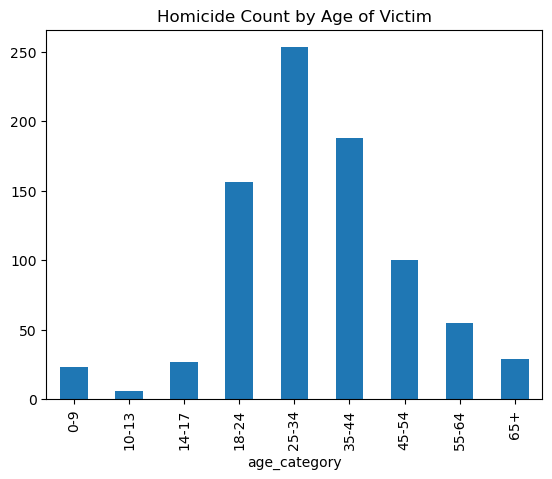

In [148]:
#plot graphing showing homicide victims by age range
data["age_category"].value_counts().sort_index().plot(kind = "bar", title = "Homicide Count by Age of Victim")

<Axes: title={'center': 'Total Homicide Percentage by Age of Victim'}, xlabel='age_category'>

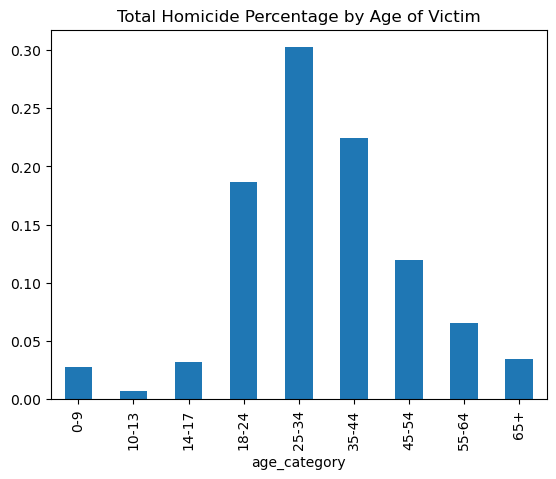

In [149]:
data["age_category"].value_counts(normalize=True).sort_index().plot(kind = "bar", title = "Total Homicide Percentage by Age of Victim")

In [37]:
df2 = data.copy()

In [45]:
#clean scene of crime column to prepare data for word frequency
df2["Scene of Crime Cleaned"] = df2["Scene of Crime"].str.replace('(map)', '')


In [47]:
#remove all digits from addresses/locations
df2["Scene of Crime Cleaned"] = df2["Scene of Crime Cleaned"].replace('\d+', '', regex = True)

In [84]:
#list of words to remove from addresses/location
banned = ["block", "of", "Rd", "Blvd", "Blvd,", "Blvd.", "Boulevard", "Court", "Court,", "Road", "Road,", "Rd", "rd", "street", "Street", "Street,", "St.", 
          "St", "St,", "st", "Lane", "Lane,", "Ln", "Ln,", "Ave", "Ave,",
          "Avenue", "Avenue,", "Ave.", "Ave.,", "Street,", "Road,", "just", "E", "east", "intersection", "Intersection",  "Way",
          "Drive", "Drive,", "Arvin", "Bakersfield", "Kern", "Shafter", "San", ",", "Wasco", "Wasco,", "Delano", "Delano," ,"Lost Hills", "Lamont",
          "Ridgecrest", "th", "in", "Tehachapi", "Mojave", "McFarland", "and", "Block", "CA", "California", "State", "Bakersfield,", "South",
         "Highway", "Highway,", "Park",  "East", "West", "Valley", "&", "S.", "north", "North", "Rosamond", "near", "at", "E."]


In [85]:
#function to remove banned words for column
f = lambda x: ' '.join([item for item in x.split() if item not in banned])
df2["Scene of Crime Cleaned"] = df2["Scene of Crime Cleaned"].apply(f)

<Axes: title={'center': 'Most Frequently Occurring Words in Scene of Crime'}, ylabel='Scene of Crime Cleaned'>

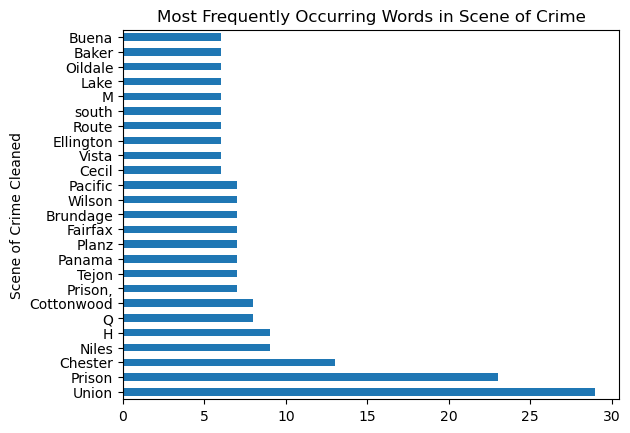

In [87]:
#plot the 25 most common words in the newly cleaned scene of crime column
df2["Scene of Crime Cleaned"].str.split().explode().value_counts().head(25).plot(kind="barh", title = "Most Frequently Occurring Words in Scene of Crime")

Union Ave, county prisons, and Chester Ave are the most frequent locations for homicides. 

In [92]:
#percentage of homicide victims in each age category that were shot
shot_ages_pct = data.groupby(by="age_category")["shot"].value_counts(normalize=True)
shot_ages_pct = pd.DataFrame(shot_ages_pct)
shot_ages_pct

proportion
age_category shot            
0-9          No      0.869565
             Yes     0.130435
10-13        No      0.666667
             Yes     0.333333
14-17        Yes     0.740741
             No      0.259259
18-24        Yes     0.647436
             No      0.352564
25-34        Yes     0.577075
             No      0.422925
35-44        Yes     0.579787
             No      0.420213
45-54        Yes     0.520000
             No      0.480000
55-64        No      0.509091
             Yes     0.490909
65+          No      0.724138
             Yes     0.275862

In [101]:
#function to find percentage of victims by specific category
def by_variable(df, grouping, column):
   frame = df.groupby(by=grouping)[column].value_counts(normalize=True)
   frame2 = pd.DataFrame(frame)
   return frame2

In [102]:
#percentage of homicide victims stabbed by age range
stabbed_pct = by_variable(data, "age_category", "stabbed")
stabbed_pct

proportion
age_category stabbed            
0-9          No         0.782609
             Yes        0.217391
10-13        No         1.000000
14-17        No         1.000000
18-24        No         0.935897
             Yes        0.064103
25-34        No         0.913043
             Yes        0.086957
35-44        No         0.920213
             Yes        0.079787
45-54        No         0.770000
             Yes        0.230000
55-64        No         0.872727
             Yes        0.127273
65+          No         0.793103
             Yes        0.206897

In [153]:
#creating dataframes for senior and minor victims
seniors = data[data["age_category"] == "65+"]
minors = data[data["Age"] < 18]

<Axes: title={'center': 'Homicides of Minors by Zipcode'}, xlabel='Zipcode'>

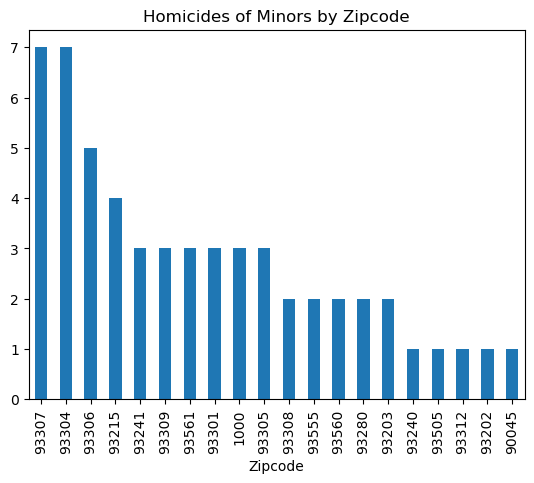

In [154]:
#plot showing the number of minors killed by zipcode -- #1000 represents unknown--Similar to distribution of all homicides
minors["Zipcode"].value_counts().plot(kind="bar", title = "Homicides of Minors by Zipcode")

<Axes: title={'center': 'Homicides of Seniors by Zipcode'}, xlabel='Zipcode'>

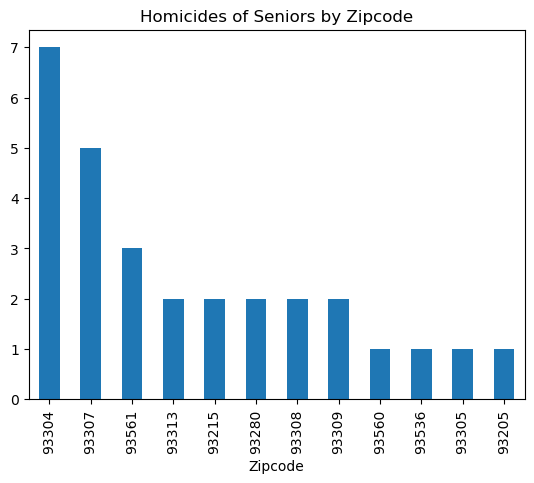

In [156]:
#graph showing the number of seniors killed by zipcode

seniors["Zipcode"].value_counts().plot(kind = "bar", title = "Homicides of Seniors by Zipcode")

In [160]:
#create a dataframes separated by major cause of death categories
shooting_victims = data[data["shooting"] == 1]
strangle_victims = data[data["strangulation"] == 1]
stabbing_victims = data[data["stabbing"] == 1]
blunt_force_victims = data[data["blunt force"] == 1]

93307 is the zipcode with the most shooting homicides.

In [162]:

shooting_victims["Zipcode"].value_counts(normalize=True)

Zipcode
93307    0.174840
93304    0.106610
93305    0.089552
93215    0.089552
93306    0.076759
93309    0.046908
93308    0.044776
93203    0.040512
93241    0.040512
93301    0.038380
93280    0.036247
93313    0.029851
93250    0.029851
93501    0.021322
93560    0.021322
93555    0.017058
93311    0.012793
93561    0.010661
93312    0.008529
93505    0.008529
93268    0.008529
93523    0.006397
93251    0.004264
93516    0.004264
93240    0.004264
93243    0.004264
93519    0.002132
93263    0.002132
93536    0.002132
93461    0.002132
93206    0.002132
93202    0.002132
93212    0.002132
93283    0.002132
93531    0.002132
93518    0.002132
93205    0.002132
Name: proportion, dtype: float64

93215 is the zipcode with the most stabbing homicides.

In [168]:

stabbing_victims["Zipcode"].value_counts(normalize=True)

Zipcode
93215    0.147727
93307    0.136364
93304    0.113636
93308    0.113636
93305    0.090909
93301    0.068182
93555    0.045455
93309    0.034091
93203    0.034091
93561    0.022727
93241    0.022727
93280    0.022727
93313    0.022727
93306    0.022727
93251    0.011364
93560    0.011364
93240    0.011364
93250    0.011364
92335    0.011364
93505    0.011364
93263    0.011364
93278    0.011364
93268    0.011364
Name: proportion, dtype: float64

93307 is the zipcode withe most homicides caused by blunt force trauma. 93309 has much higher proportion of blunt force
trauma homicides than total homicides, while 93215 has a much lower proportion.

In [169]:
blunt_force_victims["Zipcode"].value_counts(normalize=True)

Zipcode
93307    0.133333
93309    0.111111
93308    0.111111
93304    0.111111
93301    0.066667
93305    0.066667
93203    0.066667
93215    0.066667
93561    0.066667
93312    0.044444
1000     0.022222
93280    0.022222
93501    0.022222
93241    0.022222
93283    0.022222
93560    0.022222
93536    0.022222
Name: proportion, dtype: float64

93215 has the highest proportion of victims of strangulation. 93313 has a much higher proportional of victims
in this category than total homicides. 93307 is fairly low, considering its high proportion of homicides.

In [161]:
strangle_victims["Zipcode"].value_counts(normalize=True)

Zipcode
93215    0.172414
93313    0.103448
93308    0.103448
93561    0.103448
93306    0.068966
93304    0.068966
93305    0.068966
93280    0.068966
93307    0.034483
93505    0.034483
93312    0.034483
93240    0.034483
93560    0.034483
93527    0.034483
93309    0.034483
Name: proportion, dtype: float64

In [167]:
#function to get zipcode and age data
def get_subset(df, column):
    frame = df[df[column] == 1]
    zip_data = frame["Zipcode"].value_counts()
    age_data = frame["age_category"].value_counts()
    print(zip_data)
    print(age_data)

Homicides due to known gang activity are most common in 93215, 93307, and 93304, the zipcodes that have the highest homicide
rates overall. 18-34 year olds make up the majority of victims.

In [168]:

get_subset(data, "gang")

Zipcode
93215    12
93307     9
93304     8
93301     4
93305     4
93280     4
93241     3
93309     3
93561     2
93203     2
93268     2
93560     1
93250     1
Name: count, dtype: int64
age_category
25-34    18
18-24    15
35-44     6
45-54     6
55-64     4
14-17     3
0-9       2
65+       1
Name: count, dtype: int64


93308 is the zipcode with the most homicides due to domestic/family violence. Victims skew older than gang violence.

In [169]:
get_subset(data, "domestic_family")

Zipcode
93308    5
93306    4
93307    4
93280    4
93312    3
93313    3
93215    2
93283    2
93555    2
93561    1
93309    1
93304    1
93305    1
93501    1
92335    1
93505    1
93301    1
Name: count, dtype: int64
age_category
45-54    8
35-44    6
25-34    5
55-64    5
65+      5
18-24    3
0-9      2
14-17    2
Name: count, dtype: int64


In [176]:
#function to find the percentage of homicides by crime type/cause of death. This is based on information from the KGET
#homicide tracker, so it might not be up-to-date based on further findings.
def pct_crime_type(df, column):
    pct = (df[column].sum())/(df[column].count())
    pct = pct * 100
    pct = round(pct, 2)
    print (column.title() + " homicides accounts for " + str(pct) + "% of homicides from 2016-2023.")

In [178]:
#percentage of homicides by cause of death and categories based on data provided by KGET; some causes of death and 
#categories were missing/omitted
columns = ["gang", "stabbing", "strangulation", "shooting", "blunt force", "domestic_family", "robbery",
          "prison", "murder_suicide", "officer_involved", "child abuse", "accidental", "vehicular",
          "homeless_death"]
for column in columns:
    pct_crime_type(data, column)

Gang homicides accounts for 6.41% of homicides from 2016-2023.
Stabbing homicides accounts for 10.26% of homicides from 2016-2023.
Strangulation homicides accounts for 3.38% of homicides from 2016-2023.
Shooting homicides accounts for 54.66% of homicides from 2016-2023.
Blunt Force homicides accounts for 5.24% of homicides from 2016-2023.
Domestic_Family homicides accounts for 4.31% of homicides from 2016-2023.
Robbery homicides accounts for 0.82% of homicides from 2016-2023.
Prison homicides accounts for 1.63% of homicides from 2016-2023.
Murder_Suicide homicides accounts for 0.47% of homicides from 2016-2023.
Officer_Involved homicides accounts for 5.36% of homicides from 2016-2023.
Child Abuse homicides accounts for 1.17% of homicides from 2016-2023.
Accidental homicides accounts for 0.12% of homicides from 2016-2023.
Vehicular homicides accounts for 0.47% of homicides from 2016-2023.
Homeless_Death homicides accounts for 0.35% of homicides from 2016-2023.
